In [107]:
import numpy
import sympy
sympy.init_printing()

Define symbolic variables:

In [78]:
t=sympy.Symbol('t')
k=sympy.Symbol('k')
x=sympy.Symbol('x')
m=sympy.Symbol('m')

# Bessel function identities

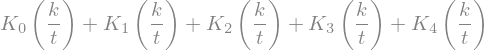

In [79]:
test=sympy.Sum(sympy.besselk(m,k/t),(m,0,4)).doit()
test

Substitution
$$
K_0(x) = K_2(x)-\frac{2}{x} K_1(x)
$$

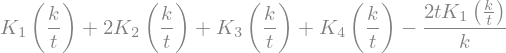

In [80]:
test2=test.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
             2*t/k*sympy.besselk(1,k/t))
display(test2)
sympy.N(test.subs(k,2).subs(t,3))-sympy.N(test2.subs(k,2).subs(t,3))

Substitution
$$
K_3(x) = K_1(x)+\frac{4}{x} K_2(x)
$$

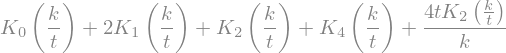

In [81]:
test3=test.subs(sympy.besselk(3,k/t),sympy.besselk(1,k/t)+
             4*t/k*sympy.besselk(2,k/t))
display(test3)
sympy.N(test.subs(k,2).subs(t,3))-sympy.N(test3.subs(k,2).subs(t,3))

# Non-degenerate expansion:

Pressure for particles:

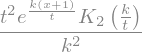

In [82]:
Pk=t**2/k/k*sympy.exp(k*(x+1)/t)*sympy.besselk(2,k/t)
display(Pk)

Pressure for particles and antiparticles together:

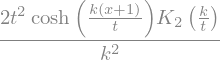

In [83]:
Pka=(2*t**2/k/k*sympy.cosh(k*(x+1)/t)*
     sympy.besselk(2,k/t))
Pka

Show that the pressure with antiparticles is correct:

In [84]:
Pka2=(Pk+t**2/k/k*sympy.exp(k*(-x-1)/t)*
      sympy.besselk(2,k/t))
Pka3=Pka2.subs(sympy.exp(k*(x+1)/t),2*sympy.cosh(k*(x+1)/t)-
               sympy.exp(-k*(x+1)/t))
sympy.simplify(Pka3-Pka)

Number density for particles:

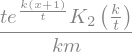

In [85]:
nk=sympy.simplify(sympy.diff(Pk,x))/m
nk

Show that $n_k/P_k = k/t/m$:

In [86]:
sympy.simplify(nk/Pk)

Compute entropy:

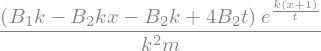

In [89]:
sk=sympy.simplify(sympy.diff(Pk,t))/m
sk2=sk.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
             2*t/k*sympy.besselk(1,k/t))
sk3=sympy.simplify(sk2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(1,k/t),sympy.Symbol('B1')))
sk3

Compute terms for energy density:

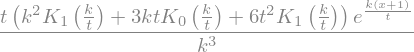

In [90]:
edk=sympy.simplify(-Pk+t*m*sk+(x+1)*m*nk)
edk

Replace K<sub>0</sub> with a combination of K<sub>1</sub> and K<sub>2</sub> and 
define
$$
B_1 \equiv K_1(k/t) \quad ; \quad B_2 \equiv K_2(k/t)
$$

In [91]:
edk2=edk.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
             2*t/k*sympy.besselk(1,k/t))

For convenience, replace with B1 and B2:

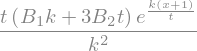

In [92]:
edk3=sympy.simplify(edk2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(1,k/t),sympy.Symbol('B1')))
edk3

Number density with antiparticles:

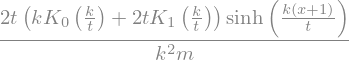

In [93]:
nka=sympy.simplify(sympy.diff(Pka,x))/m
nka

Compute nka/Pka:

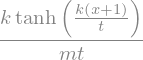

In [94]:
sympy.simplify(nka/Pka)

Entropy with antiparticles:

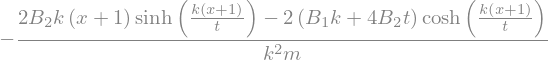

In [95]:
ska=sympy.simplify(sympy.diff(Pka,t))/m
ska2=ska.subs(sympy.besselk(3,k/t),sympy.besselk(1,k/t)+
             4*t/k*sympy.besselk(2,k/t))
ska3=sympy.simplify(ska2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(1,k/t),sympy.Symbol('B1')))
ska3

Energy density with antiparticles:

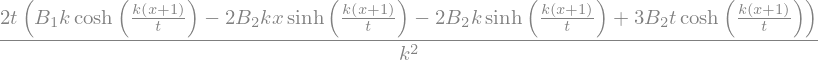

In [96]:
edka=sympy.simplify(-Pka+t*ska*m-(x+1)*m*nka)
edka2=edka.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
             2*t/k*sympy.besselk(1,k/t))
edka3=sympy.simplify(edka2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(1,k/t),sympy.Symbol('B1')))
sympy.simplify(edka3)

## Testing numerical values for nondegenerate expansion

Electrons at T=0.1 MeV:

In [98]:
tval=0.1/0.511

In [99]:
Tval=0.1/197.33

In [100]:
mval=0.511/197.33

In [101]:
muval=8.0e-12

In [102]:
psival=(muval-mval)/Tval

In [103]:
xval=tval*psival

Construct an array of pressure, density, entropy, and energy density for a range of value for k:

In [104]:
arr=[Pk,nk,sk,edk,Pka,nka,ska,edka]

In [105]:
arr2=[arr[i].subs('t',tval).subs('x',xval).subs('m',mval) 
      for i in range(0,8)]

In [108]:
arr3=numpy.zeros( (8, 5) )
for i in range(0,8):
    for j in range(0,5):
        arr3[i][j]=sympy.N(arr2[i].subs('k',j+1))
print(arr3)

[[1.78966486e-04 1.62882635e-07 3.37209953e-10 9.63299320e-13
  3.27050929e-15]
 [3.53154567e-01 6.42832607e-04 1.99624920e-06 7.60351419e-09
  3.22684799e-11]
 [2.79478879e+00 4.14195654e-03 1.19406589e-05 4.37722408e-08
  1.81481669e-10]
 [1.23733555e-03 1.93611729e-06 5.71390187e-09 2.12189542e-11
  8.86981063e-14]
 [3.57932966e-04 3.25765259e-07 6.74419874e-10 1.92659852e-12
  6.54101806e-15]
 [1.11500790e-08 4.05920517e-11 1.89081532e-13 9.60256926e-16
  5.09403121e-18]
 [5.58957751e+00 8.28391284e-03 2.38813168e-05 8.75444763e-08
  3.62963310e-10]
 [2.47467105e-03 3.87223445e-06 1.14278032e-08 4.24379057e-11
  1.77396199e-13]]
